In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
CBWs         = [   2,   4,   6]
PBWs         = [  10,  16,  24]
CWNDs        = [  16, 64, 256, 512, 1024]
TTIME        = 5
NUM_START    = 1
NUM_END      = 250
STEP         = 5
NUMEXP       = f"{NUM_START}-{NUM_END}"
TPTALGOs     = ['TCPreno','TCPcubic'] #,'UDP']
ATK_PARA     = range(NUM_START, NUM_END + 2, STEP)
hostnames    = ['atkr'] + [f'h{i}' for i in range(8)]
iperf_header = ['timestamp','src_addr','src_port','dest_addr','dest_port','transferID','interval','transferred_bytes','bits_per_second']

indices      = [('CBW', CBWs), ('PBW', PBWs), ('CWND', CWNDs), ('TPTALGO', TPTALGOs)]

basedir   = f'../results/NUMEXP-{NUMEXP}_TTIME-{TTIME}_STEP-{STEP}'

# unpacking loop to deal with xingyiz zip spam ANNOYING
# for CBW in CBWs:
#     for PBW in PBWs:
#         for CWND in CWNDs:
#             os.system(f'mkdir -p ./NUMEXP-{NUMEXP}_TTIME-{TTIME}/CBW-{CBW}/PBW-{PBW}/CWND-{CWND}K/')
#             os.system(f'unzip ../results/CBW-{CBW}_PBW-{PBW}_CWND-{CWND}K_NUMEXP-{NUMEXP}_TTIME-{TTIME}.zip')
#             os.system(f'mv ./CBW-{CBW}_PBW-{PBW}_CWND-{CWND}K_NUMEXP-{NUMEXP}_TTIME-{TTIME}/* ./NUMEXP-{NUMEXP}_TTIME-{TTIME}/CBW-{CBW}/PBW-{PBW}/CWND-{CWND}K/')
#             os.system(f'rmdir ./CBW-{CBW}_PBW-{PBW}_CWND-{CWND}K_NUMEXP-{NUMEXP}_TTIME-{TTIME}')

In [3]:
dfall = []
for CBW in CBWs:
    for PBW in PBWs:
        for CWND in CWNDs: 
            for TPTALGO in TPTALGOs:
                for APC in ATK_PARA:
                    for HOST in hostnames:
                        dfi = pd.read_csv(f'{basedir}/CBW-{CBW}/PBW-{PBW}/CWND-{CWND}K/{TPTALGO}/{APC}conn/iperf_{HOST}.csv', names=iperf_header)
                        dfi['host']    = HOST
                        dfi['APC']     = APC
                        dfi['TPTALGO'] = TPTALGO
                        dfi['CWND']    = CWND
                        dfi['PBW']     = PBW
                        dfi['CBW']     = CBW
                        dfall.append(dfi.tail(1))
                        
dfbigboi = pd.concat(dfall)
dfbigboi

timestamp  src_addr src_port  dest_addr dest_port transferID  \
41  20211123172648  10.0.0.1        0  10.0.0.10      5001         -1   
5   20211123172648  10.0.0.2    56802  10.0.0.10      5001          3   
5   20211123172648  10.0.0.3    35036  10.0.0.10      5001          3   
5   20211123172648  10.0.0.4    52902  10.0.0.10      5001          3   
5   20211123172648  10.0.0.6    59318  10.0.0.10      5001          3   
..             ...       ...      ...        ...       ...        ...   
5   20211124061053  10.0.0.5    47186  10.0.0.10      5001          3   
5   20211124061053  10.0.0.6    60998  10.0.0.10      5001          3   
5   20211124061053  10.0.0.7    44062  10.0.0.10      5001          3   
5   20211124061053  10.0.0.8    37544  10.0.0.10      5001          3   
5   20211124061053  10.0.0.9    48774  10.0.0.10      5001          3   

   interval transferred_bytes bits_per_second  host  APC   TPTALGO  CWND  PBW  \
41  0.0-5.1           1329264         2089872  atkr    6   TCPreno    16   10   
5   0.0-5.1            713864         1130054    h0    6   TCPreno    16   10   
5   0.0-5.0            722552         1145723    h1    6   TCPreno    16   10   
5   0.0-5.0            725448         1153020    h2    6   TCPreno    16   10   
5   0.0-5.0            725448         1149459    h4    6   TCPreno    16   10   
..      ...               ...             ...   ...  ...       ...   ...  ...   
5   0.0-5.4           1572864         2318183    h3  251  TCPcubic  1024   24   
5   0.0-5.5           1572864         2305266    h4  251  TCPcubic  1024   24   
5   0.0-5.5           1572864         2303993    h5  251  TCPcubic  1024   24   
5   0.0-5.4           1572864         2314163    h6  251  TCPcubic  1024   24   
5   0.0-5.0           1441792         2299700    h7  251  TCPcubic  1024   24   

    CBW  
41    2  
5     2  
5     2  
5     2  
5     2  
..  ...  
5     6  
5     6  
5     6  
5     6  
5     6  

[35343 rows x 15 columns]

In [4]:
df0 = dfbigboi[dfbigboi['APC'] == 7]
# df0[df0['transport'] == ]

In [5]:
df0

Empty DataFrame
Columns: [timestamp, src_addr, src_port, dest_addr, dest_port, transferID, interval, transferred_bytes, bits_per_second, host, APC, TPTALGO, CWND, PBW, CBW]
Index: []

In [6]:
for HOST in hostnames:
    print(HOST)

atkr
h0
h1
h2
h3
h4
h5
h6
h7


3 x 3	 CBW 	vs.   PBW
3 x 5	 CBW 	vs.   CWND


/tmp/ipykernel_2867/719432913.py:26: RuntimeWarning: invalid value encountered in double_scalars
  host_total = df3.sum()['transferred_bytes'] // df3.shape[0]


3 x 2	 CBW 	vs.   TPTALGO
3 x 3	 PBW 	vs.   CBW
3 x 5	 PBW 	vs.   CWND
3 x 2	 PBW 	vs.   TPTALGO
5 x 3	 CWND 	vs.   CBW
5 x 3	 CWND 	vs.   PBW
5 x 2	 CWND 	vs.   TPTALGO
2 x 3	 TPTALGO 	vs.   CBW
2 x 3	 TPTALGO 	vs.   PBW
2 x 5	 TPTALGO 	vs.   CWND


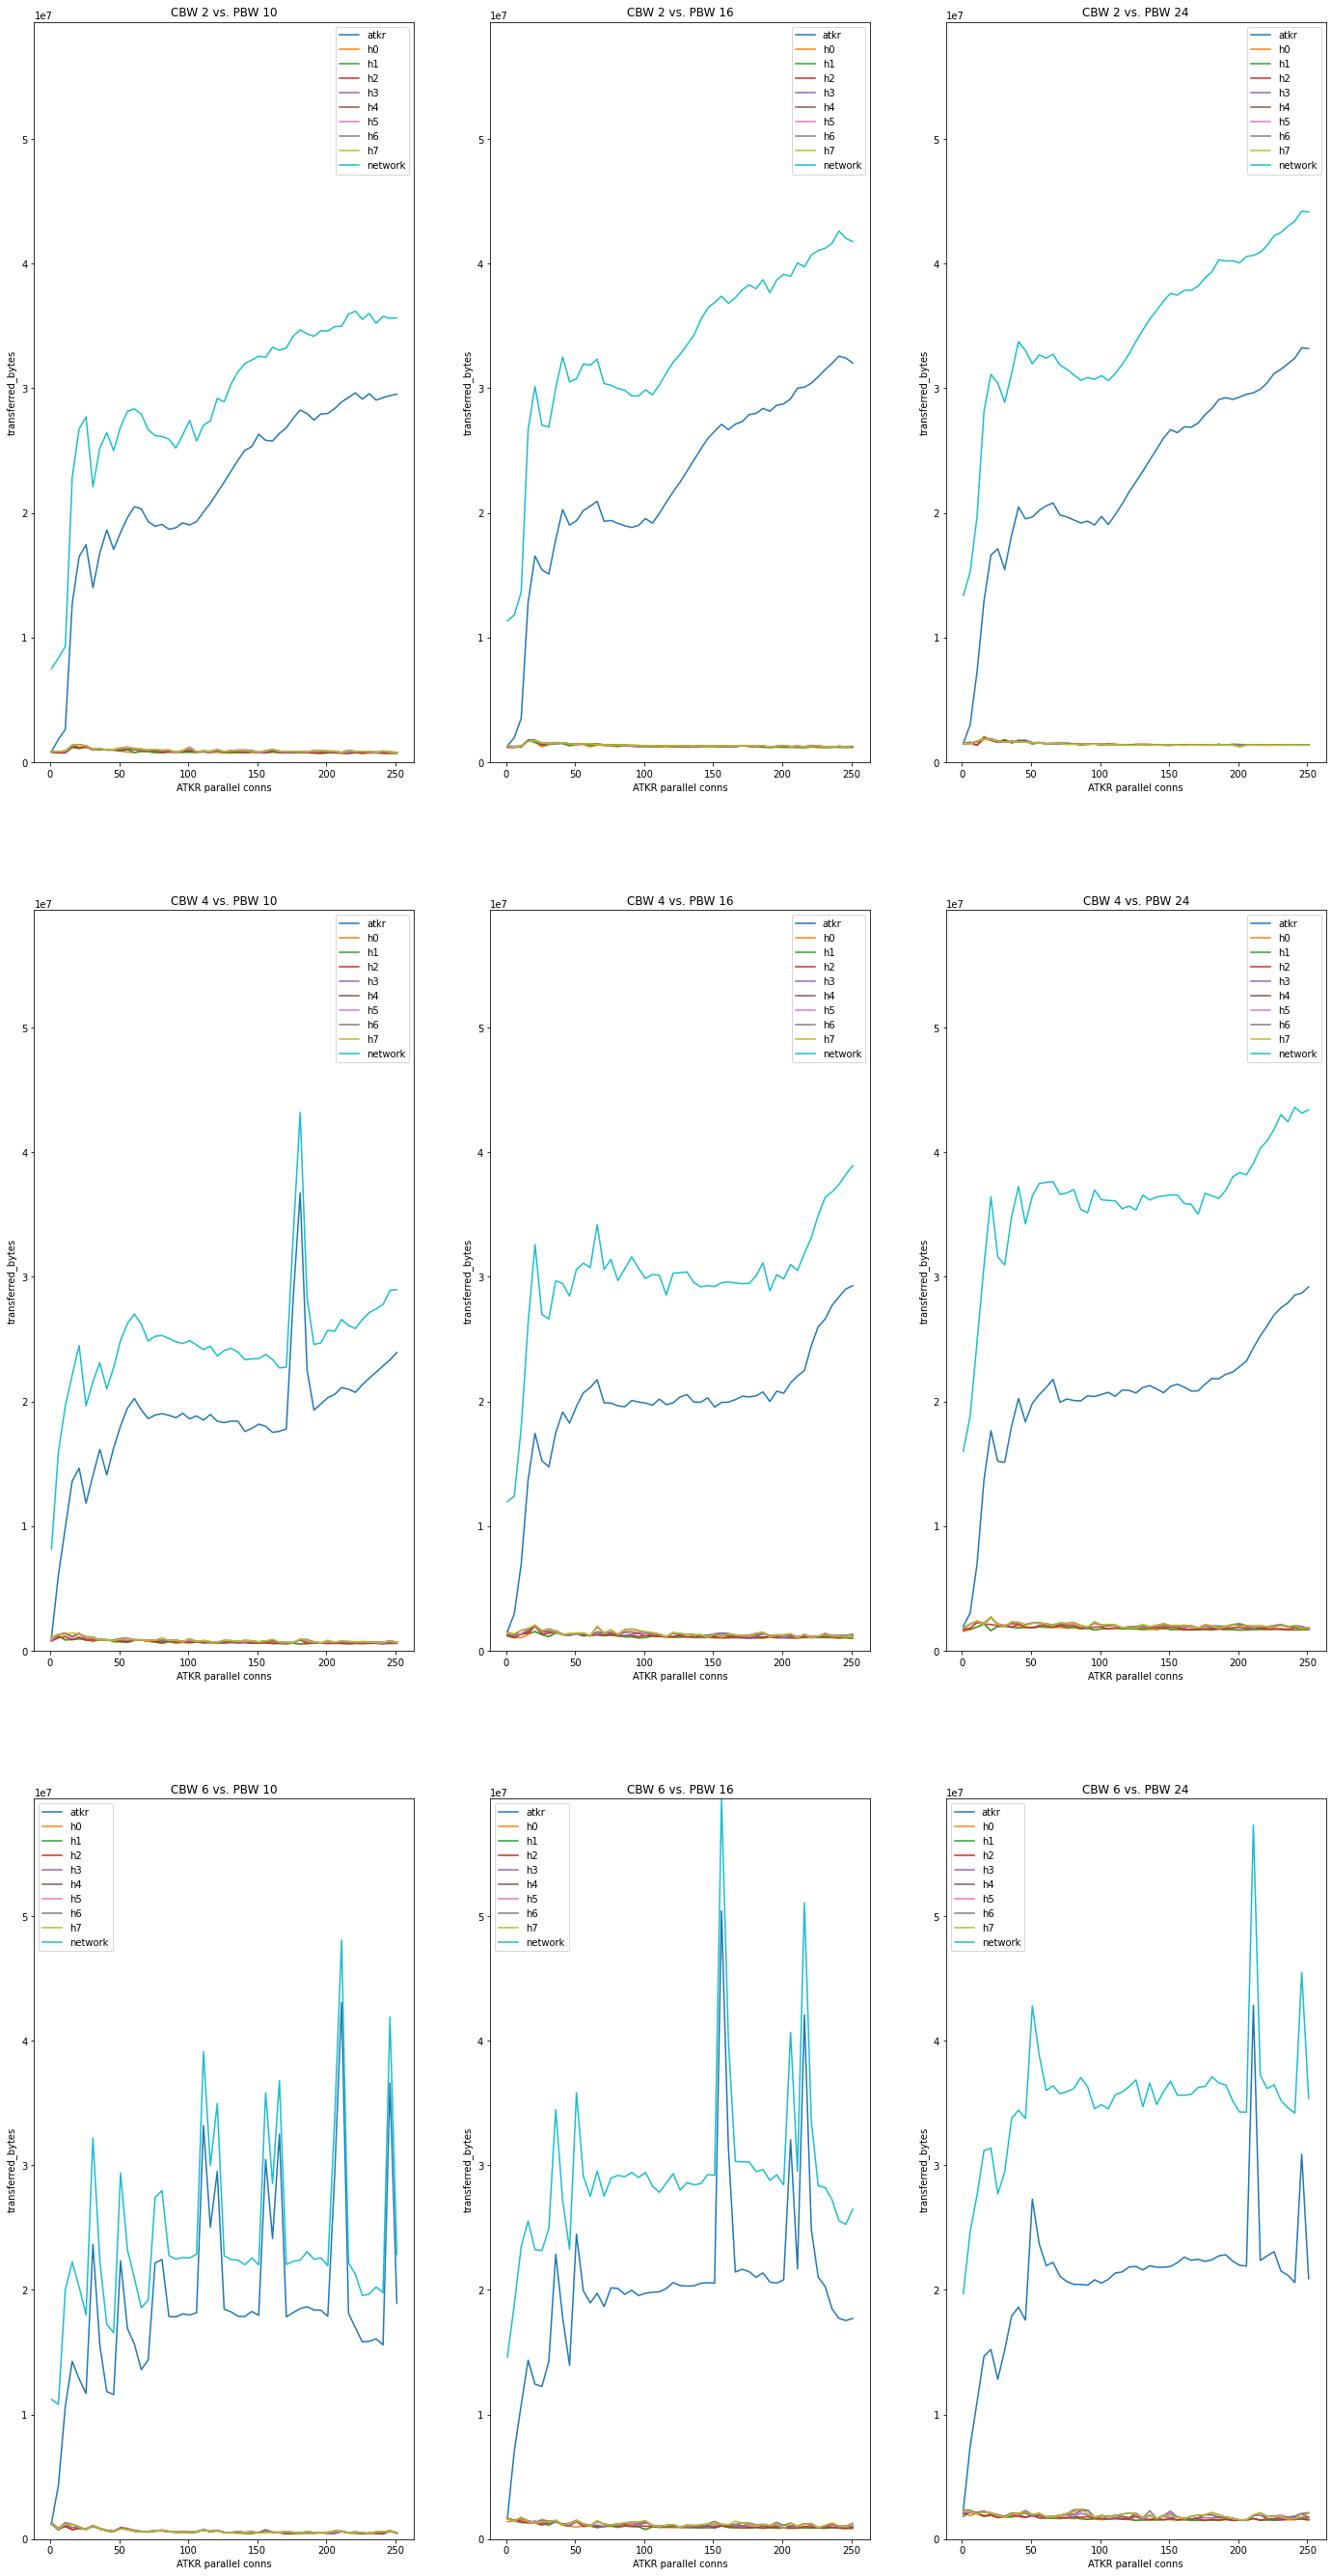

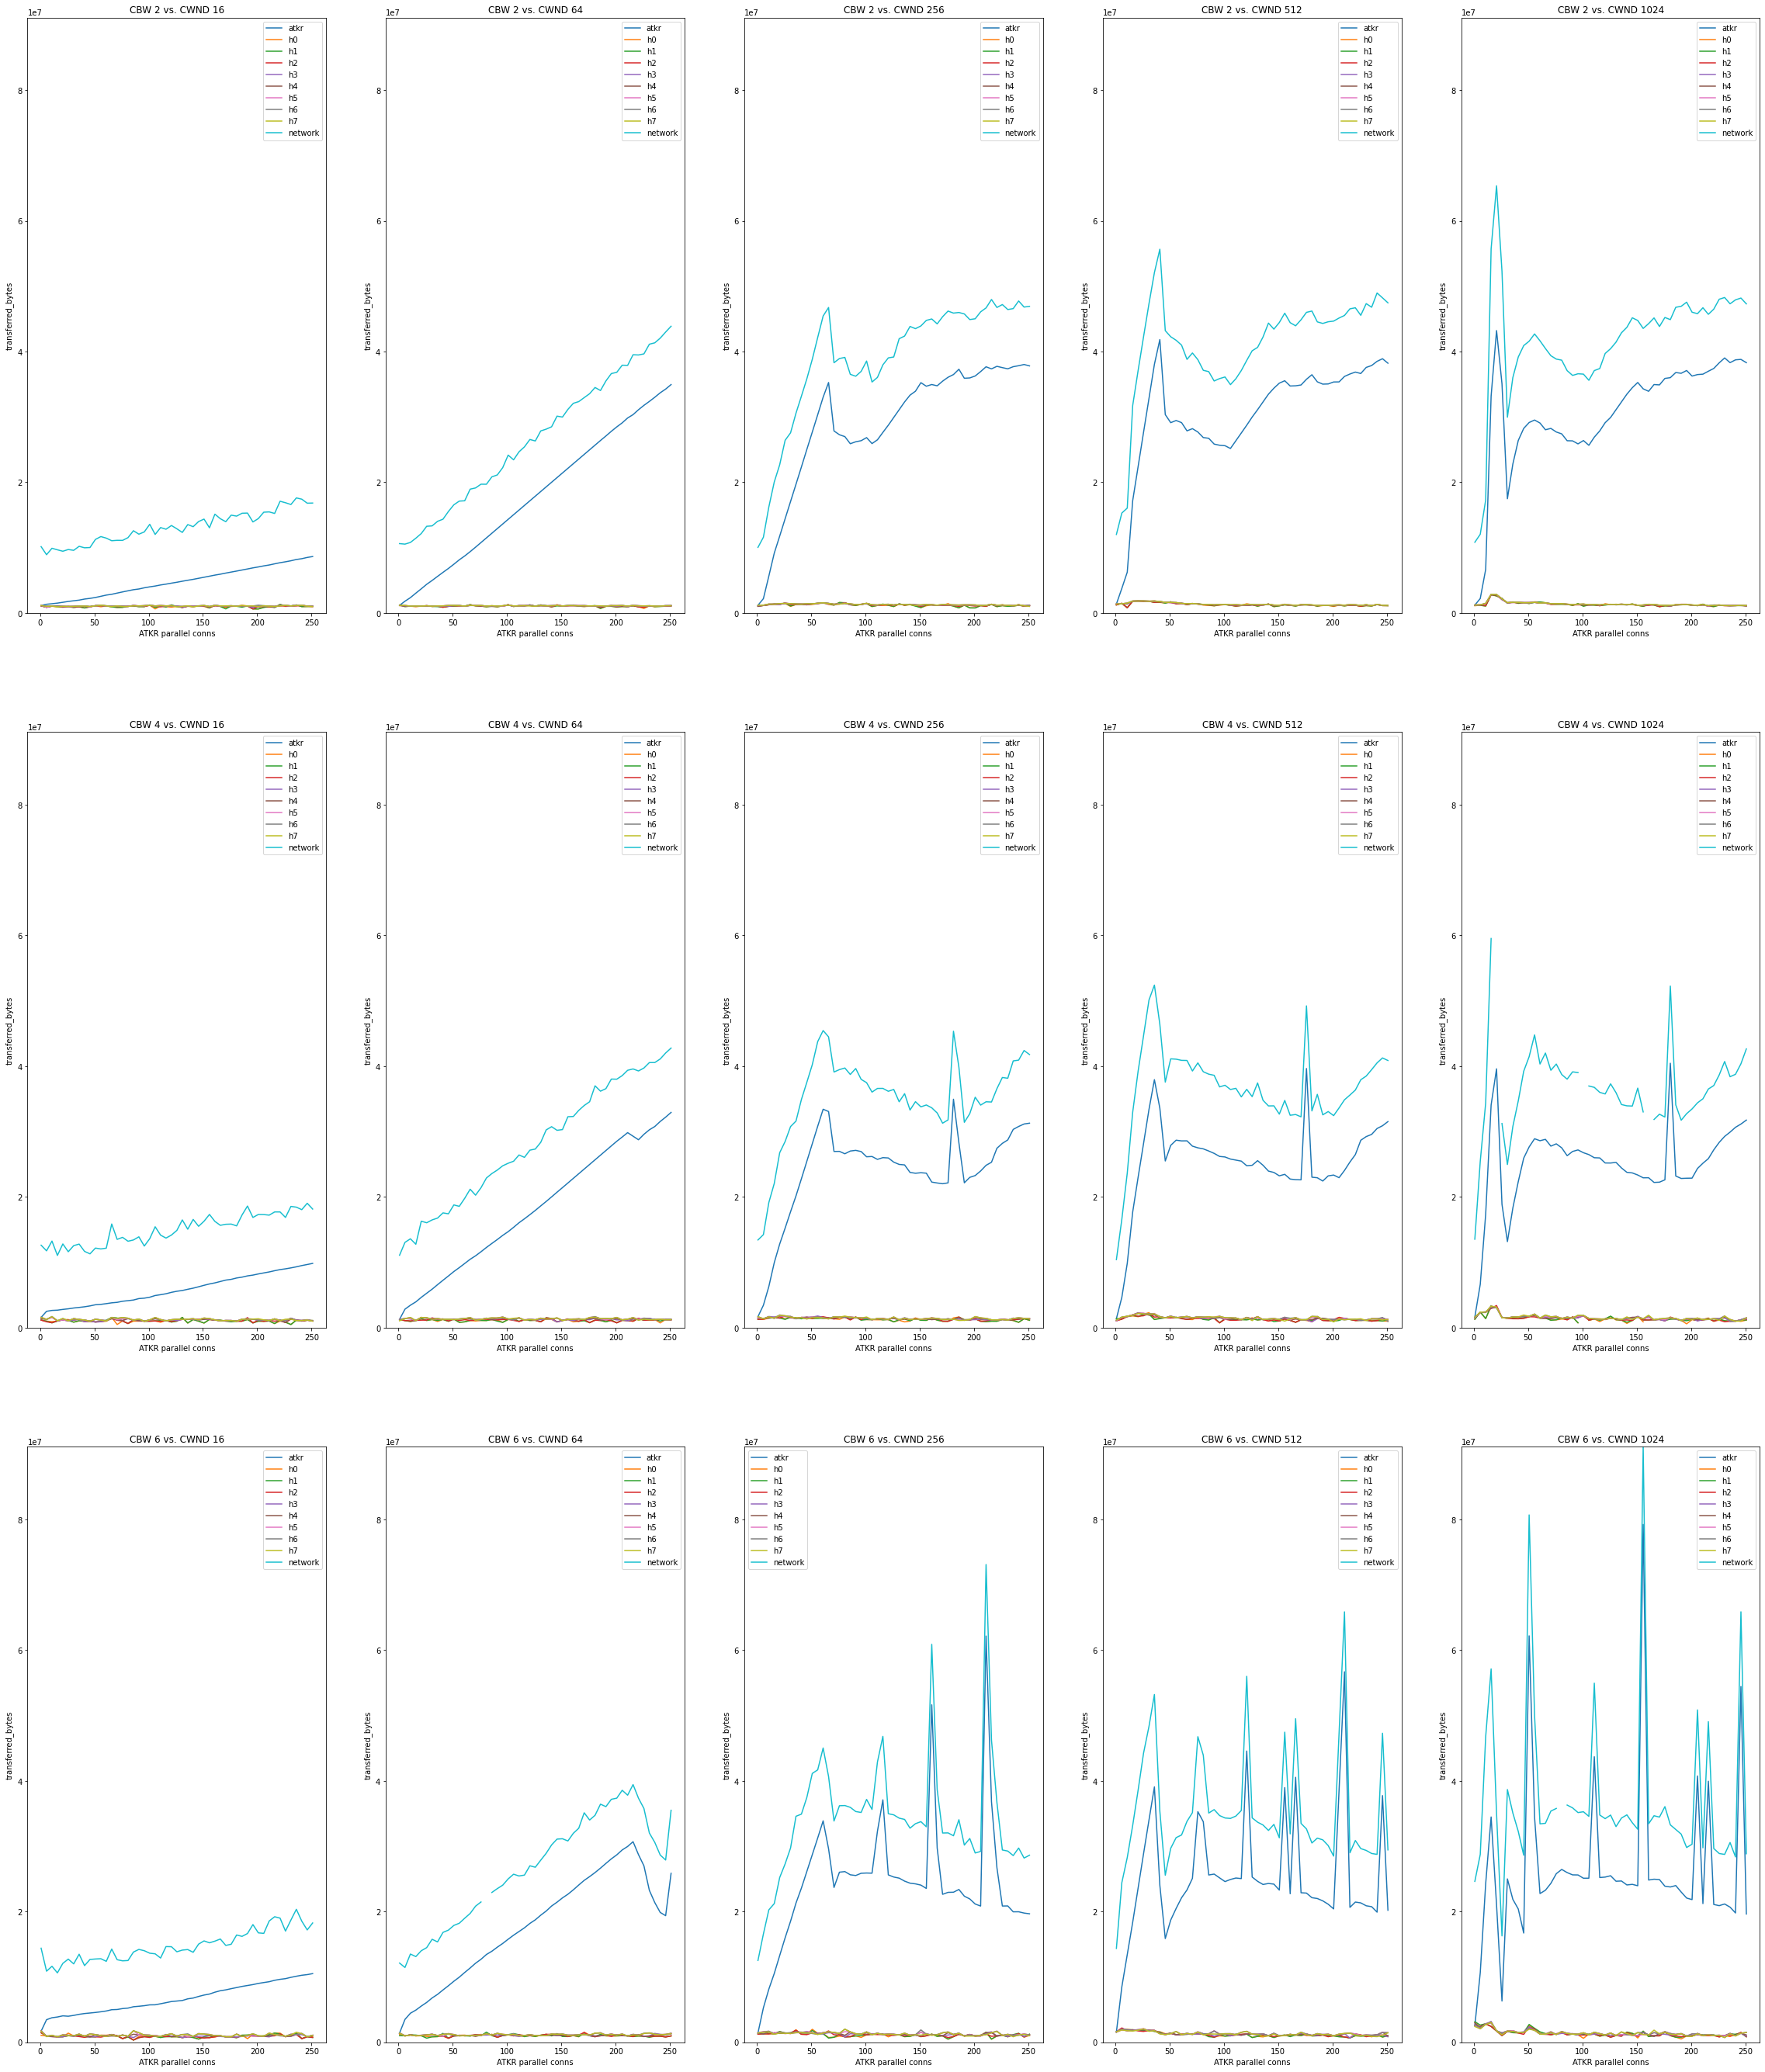

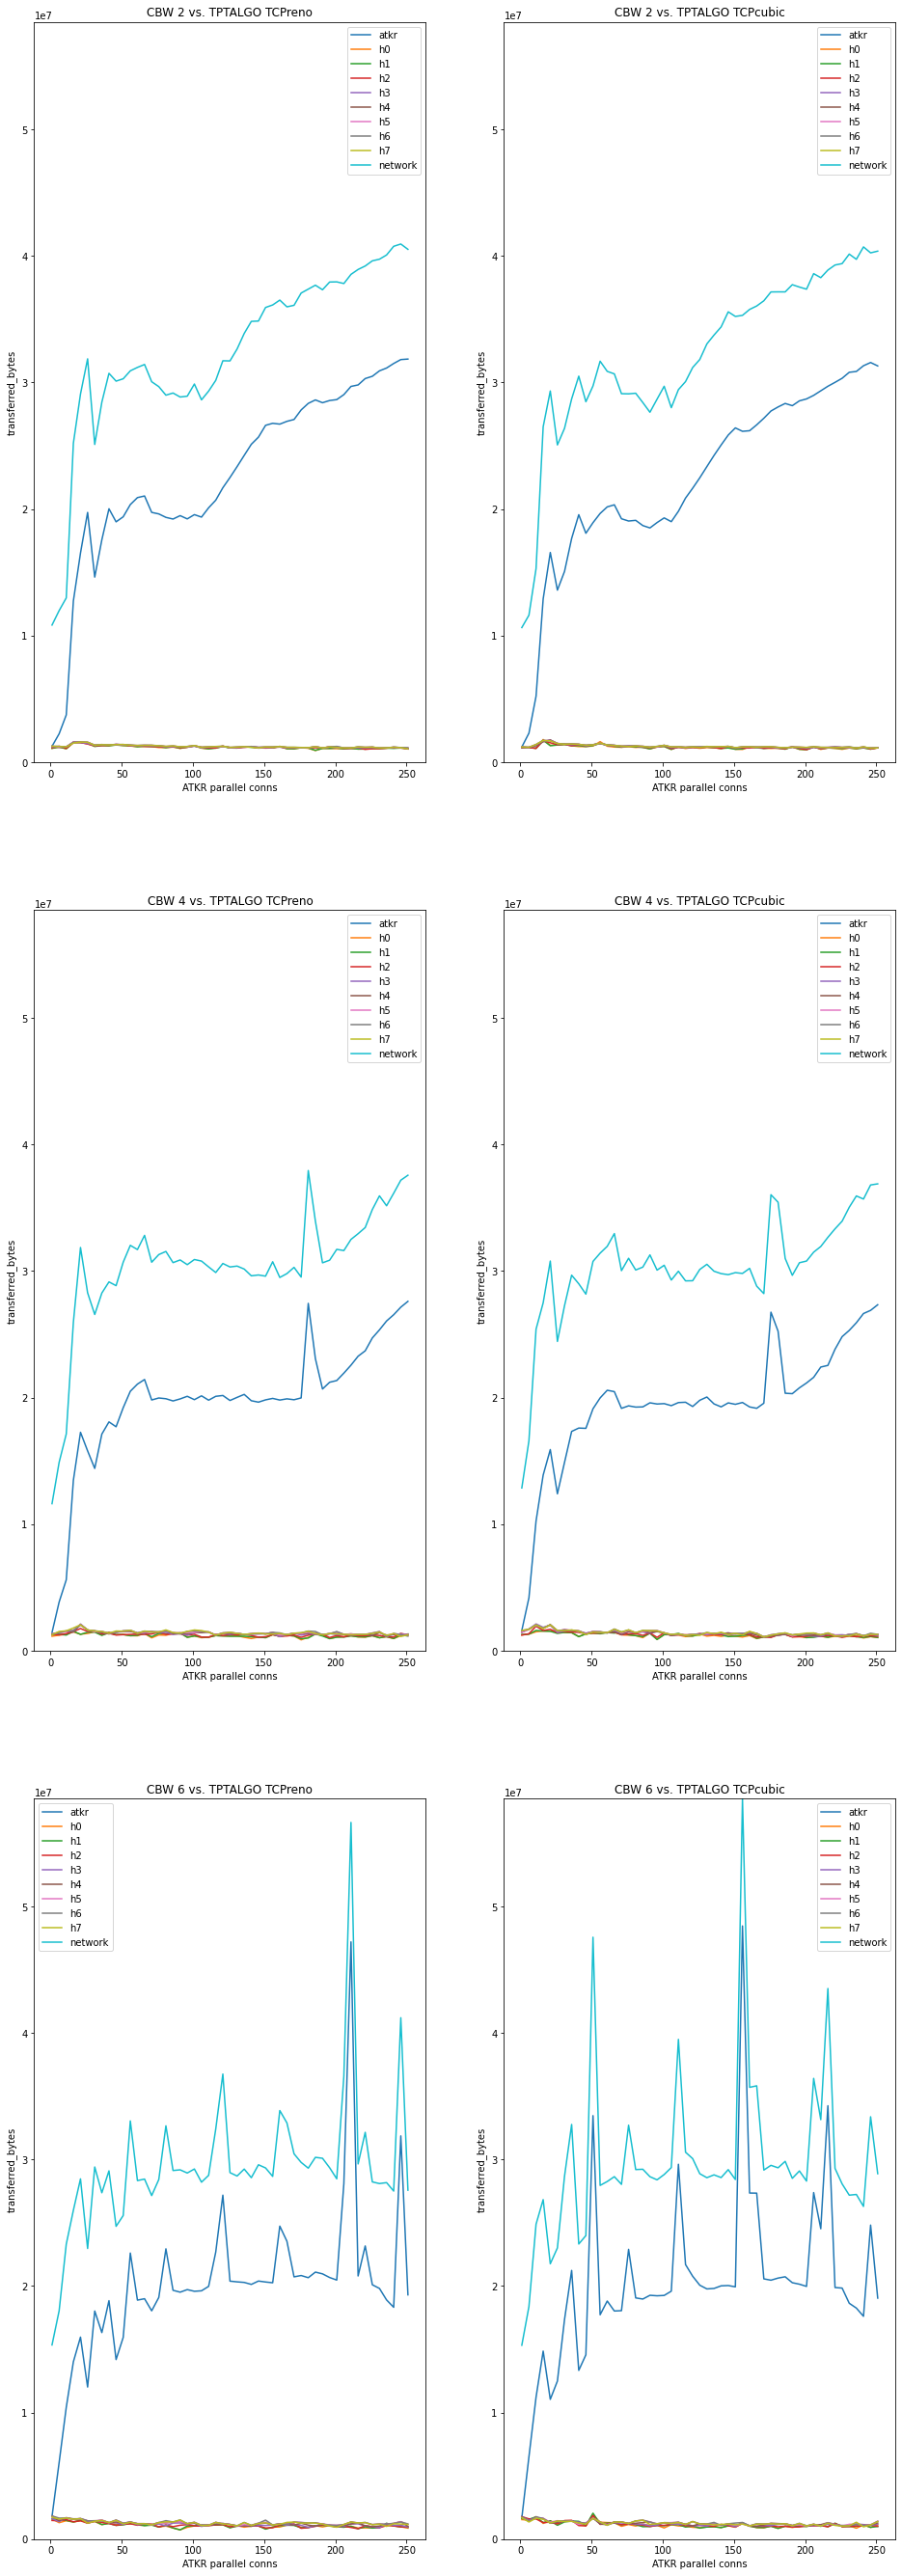

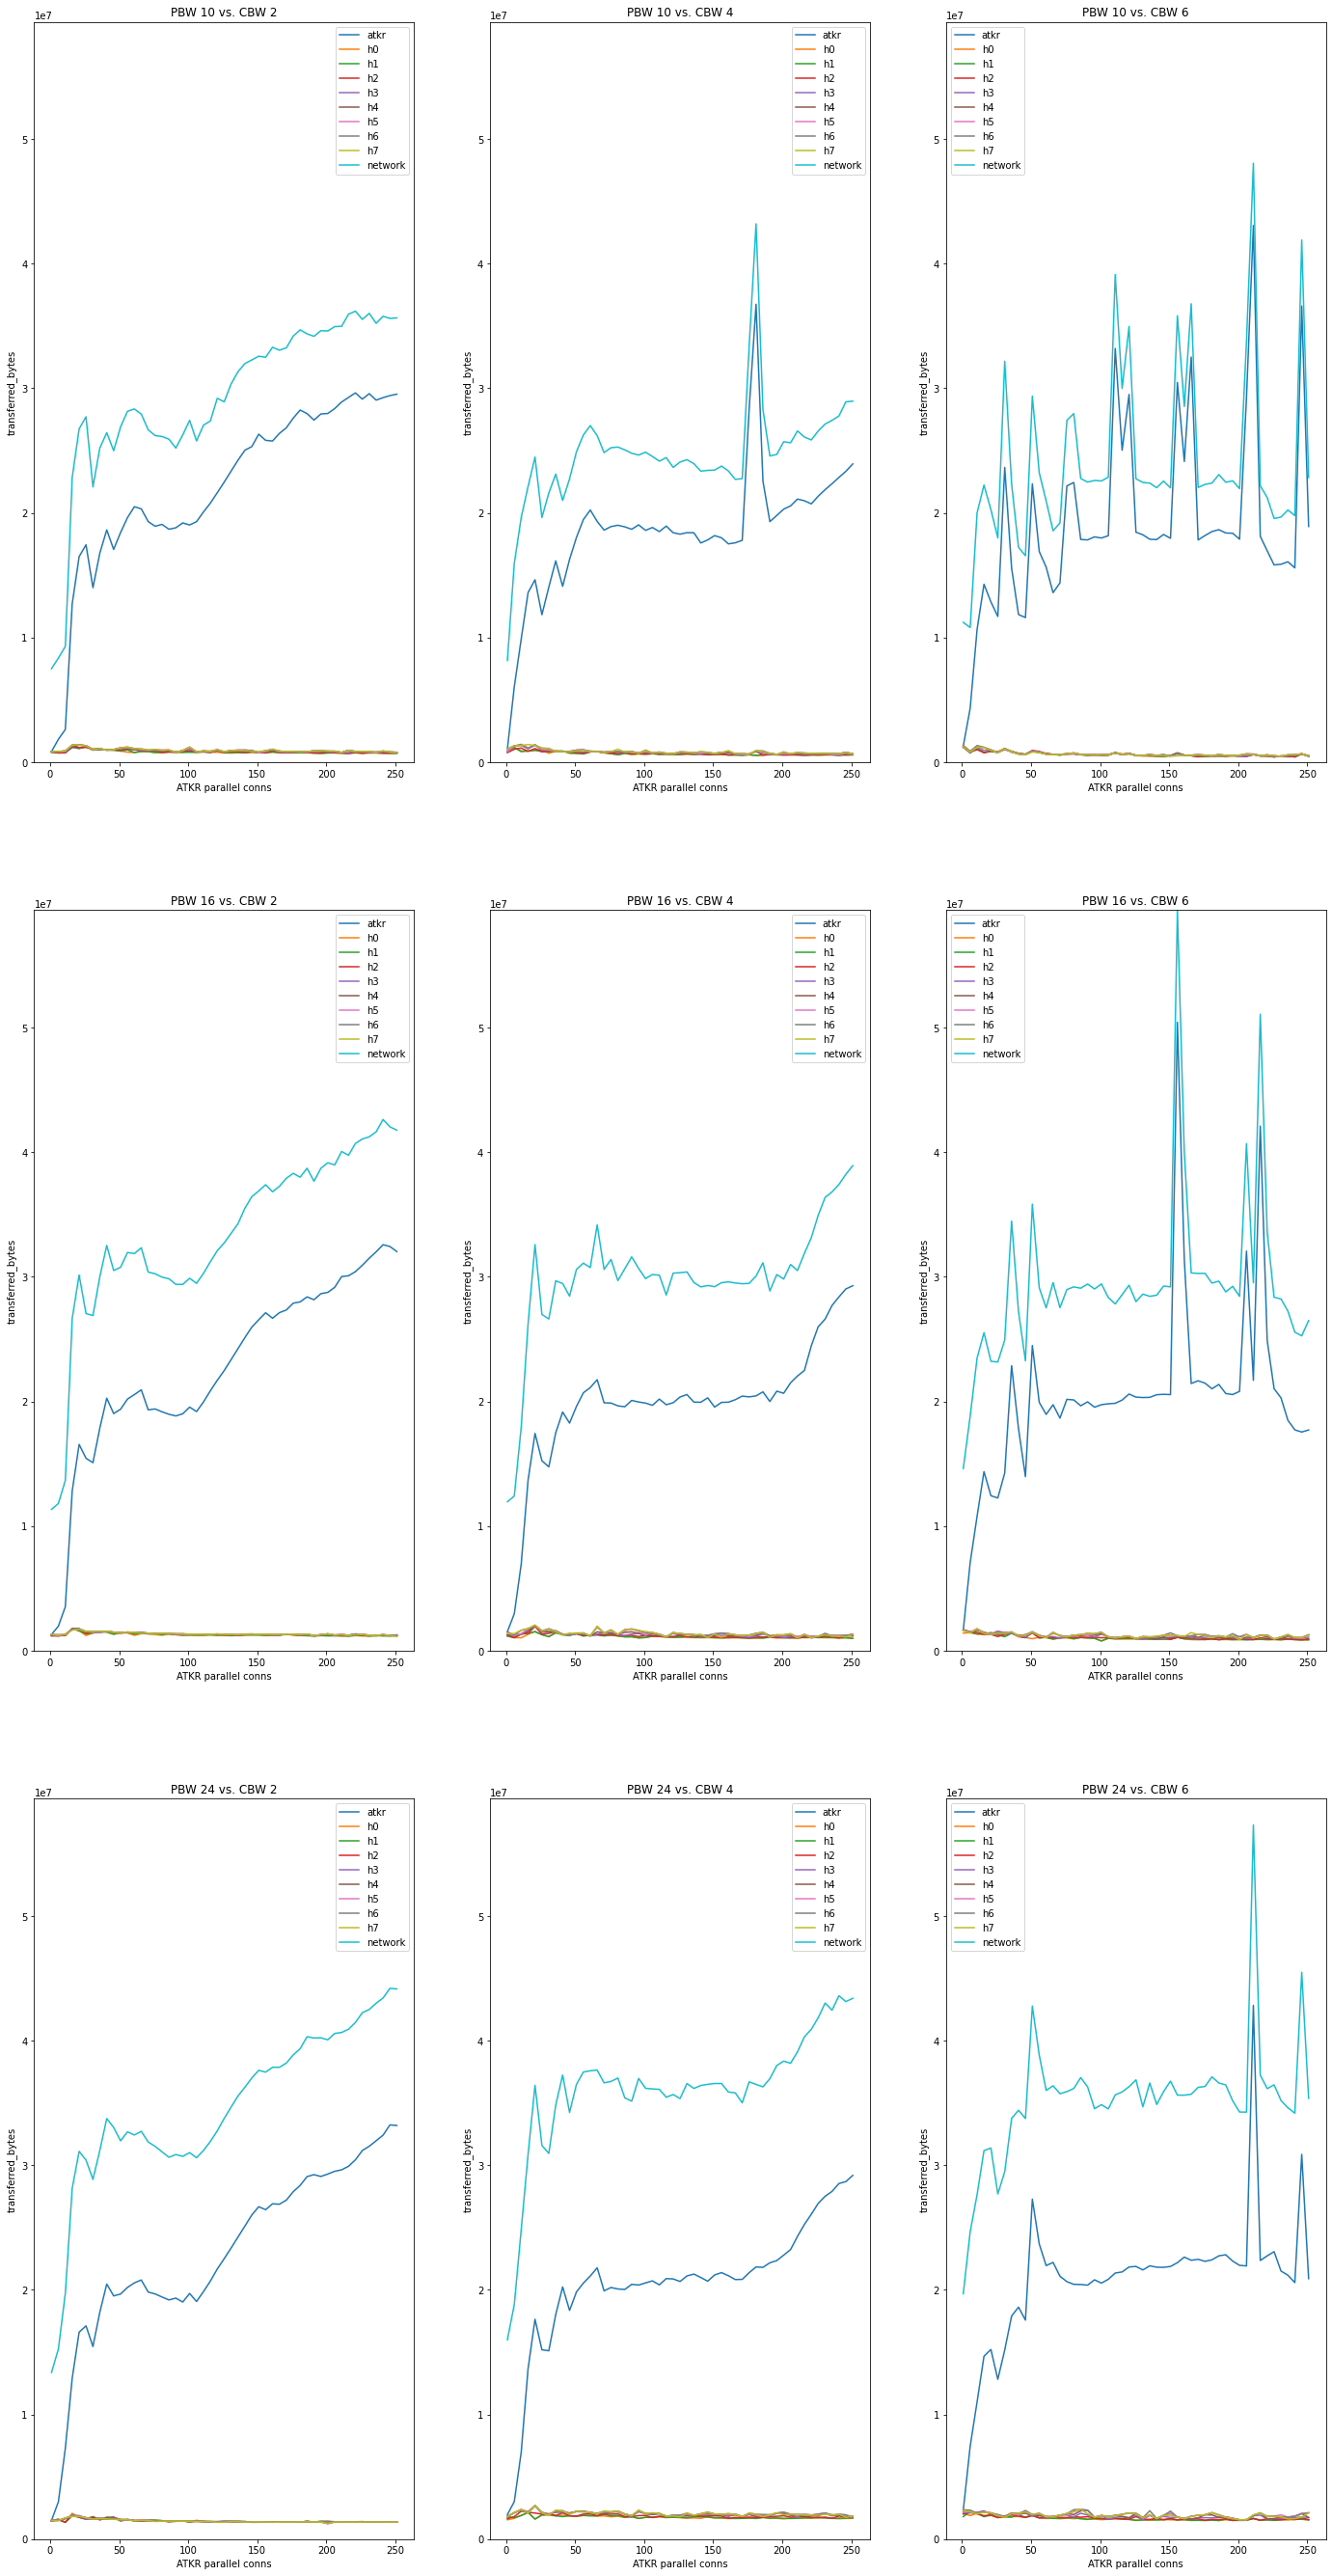

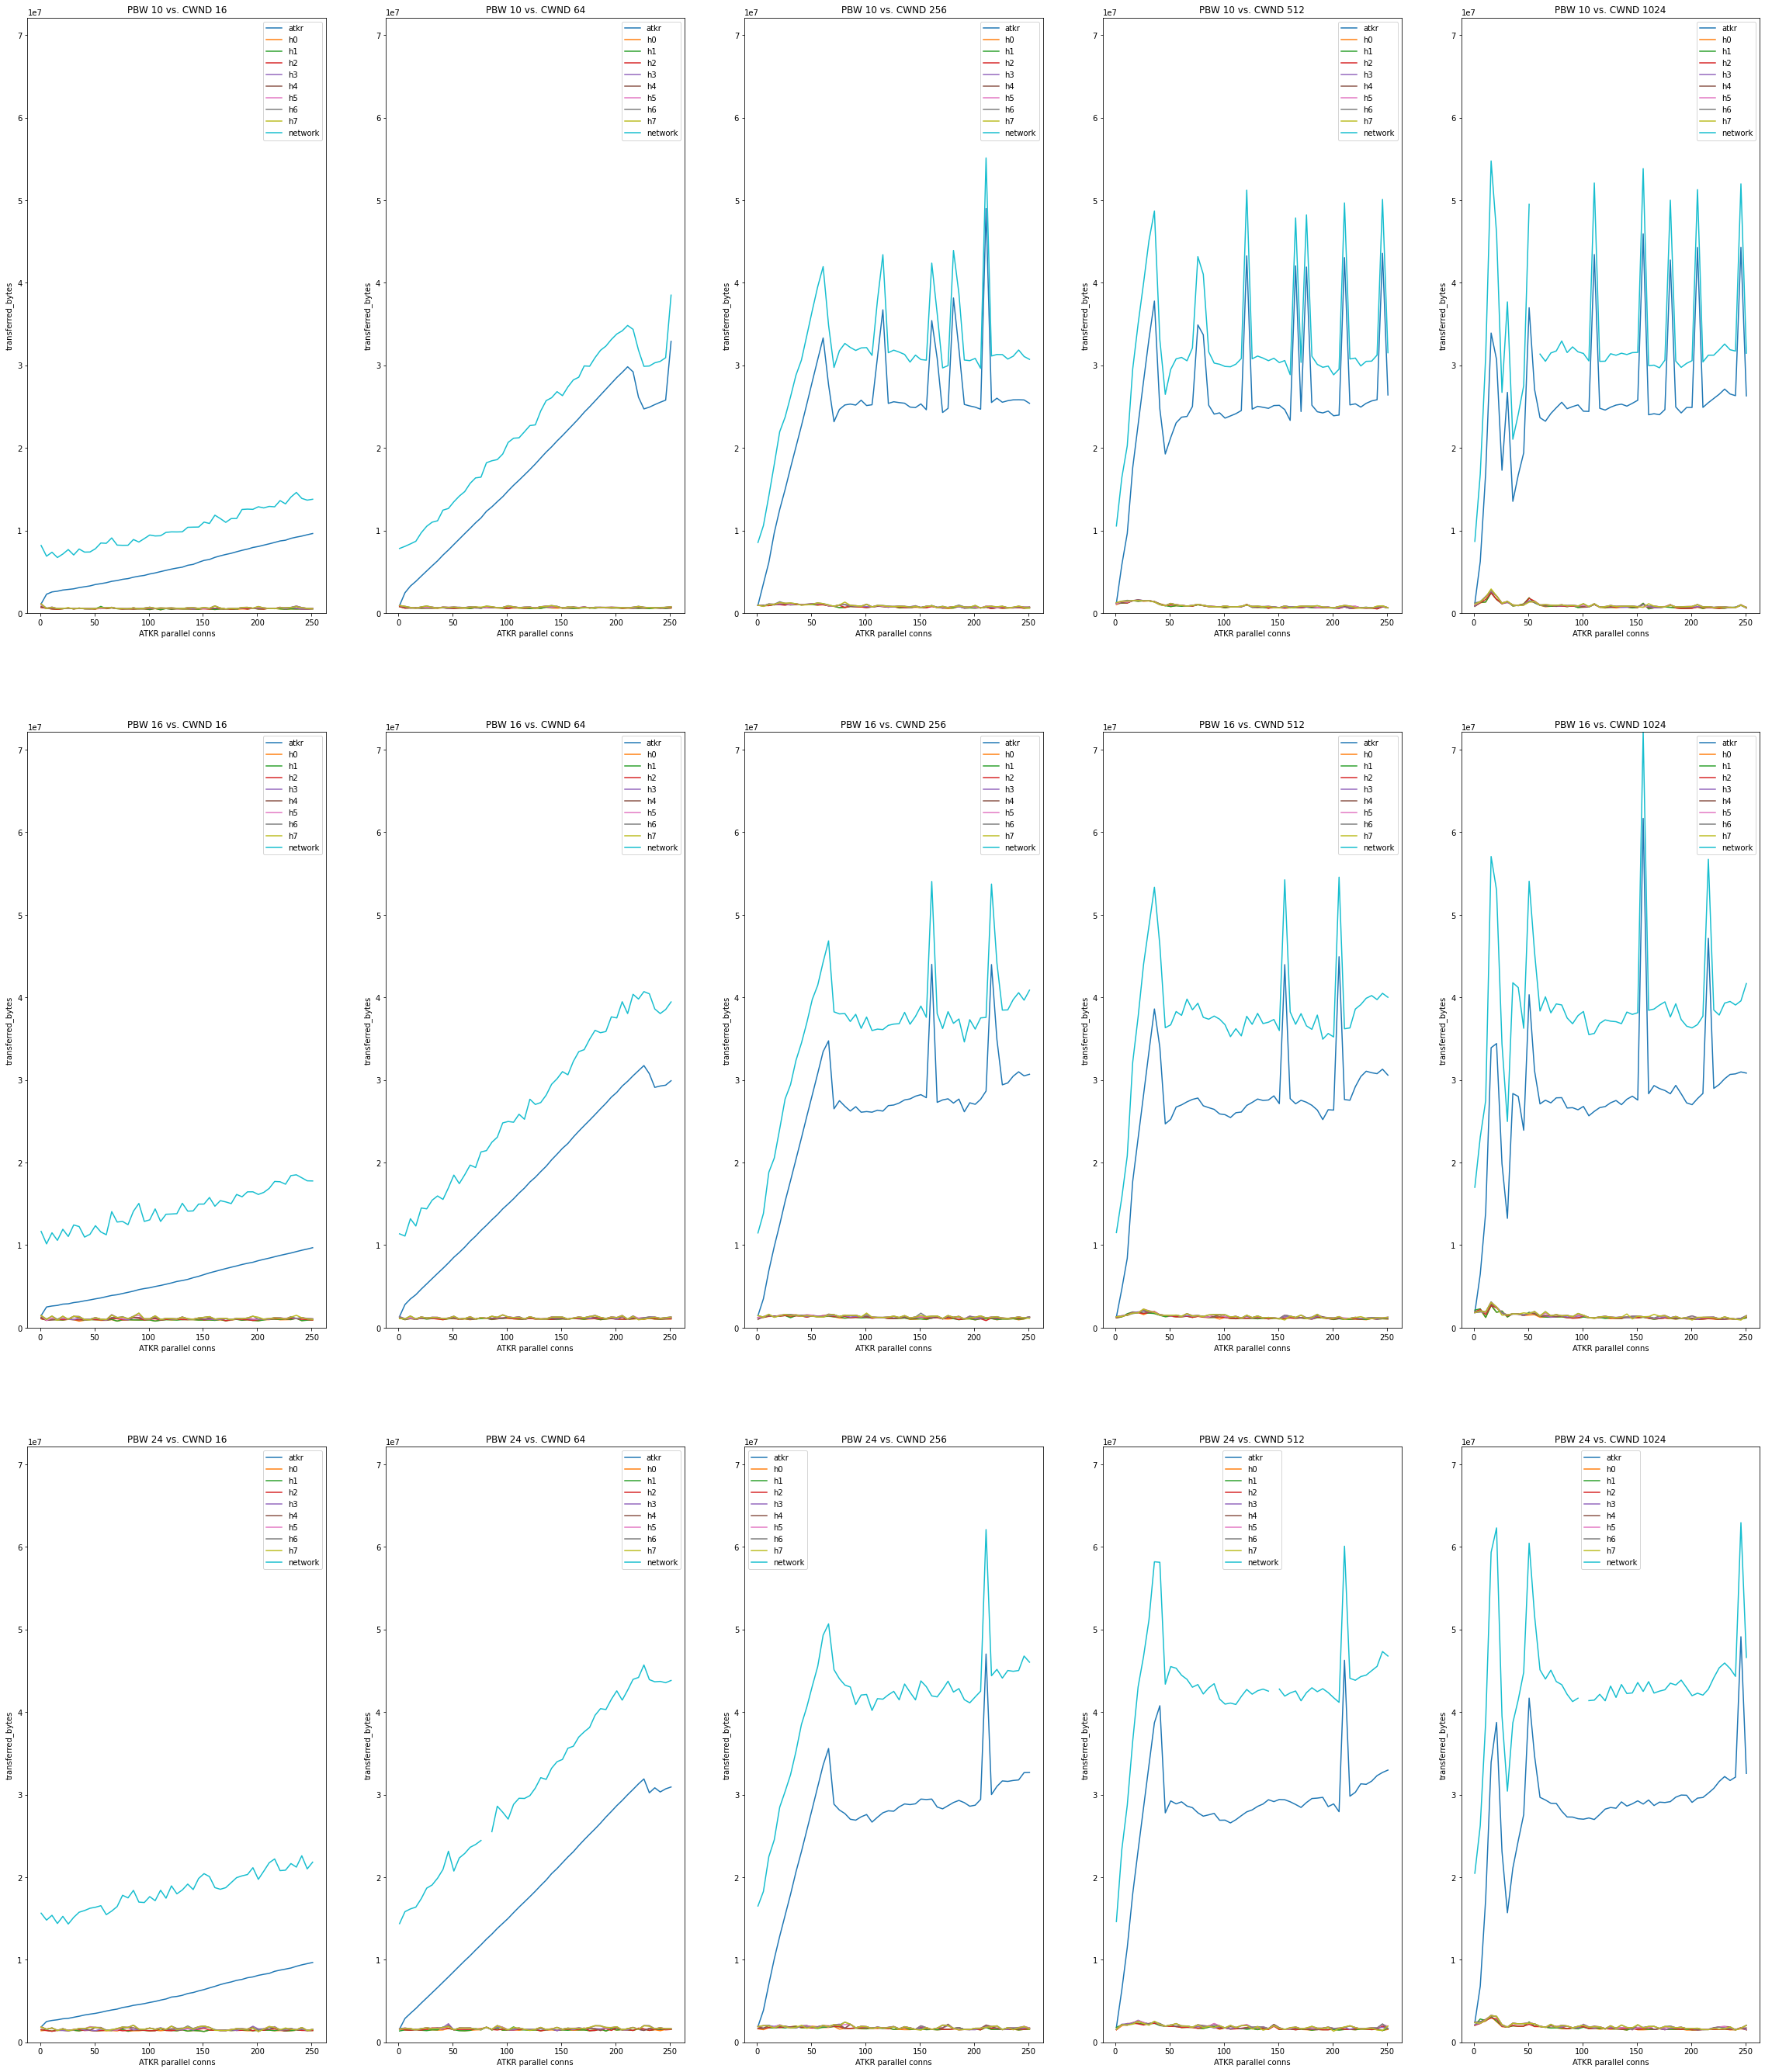

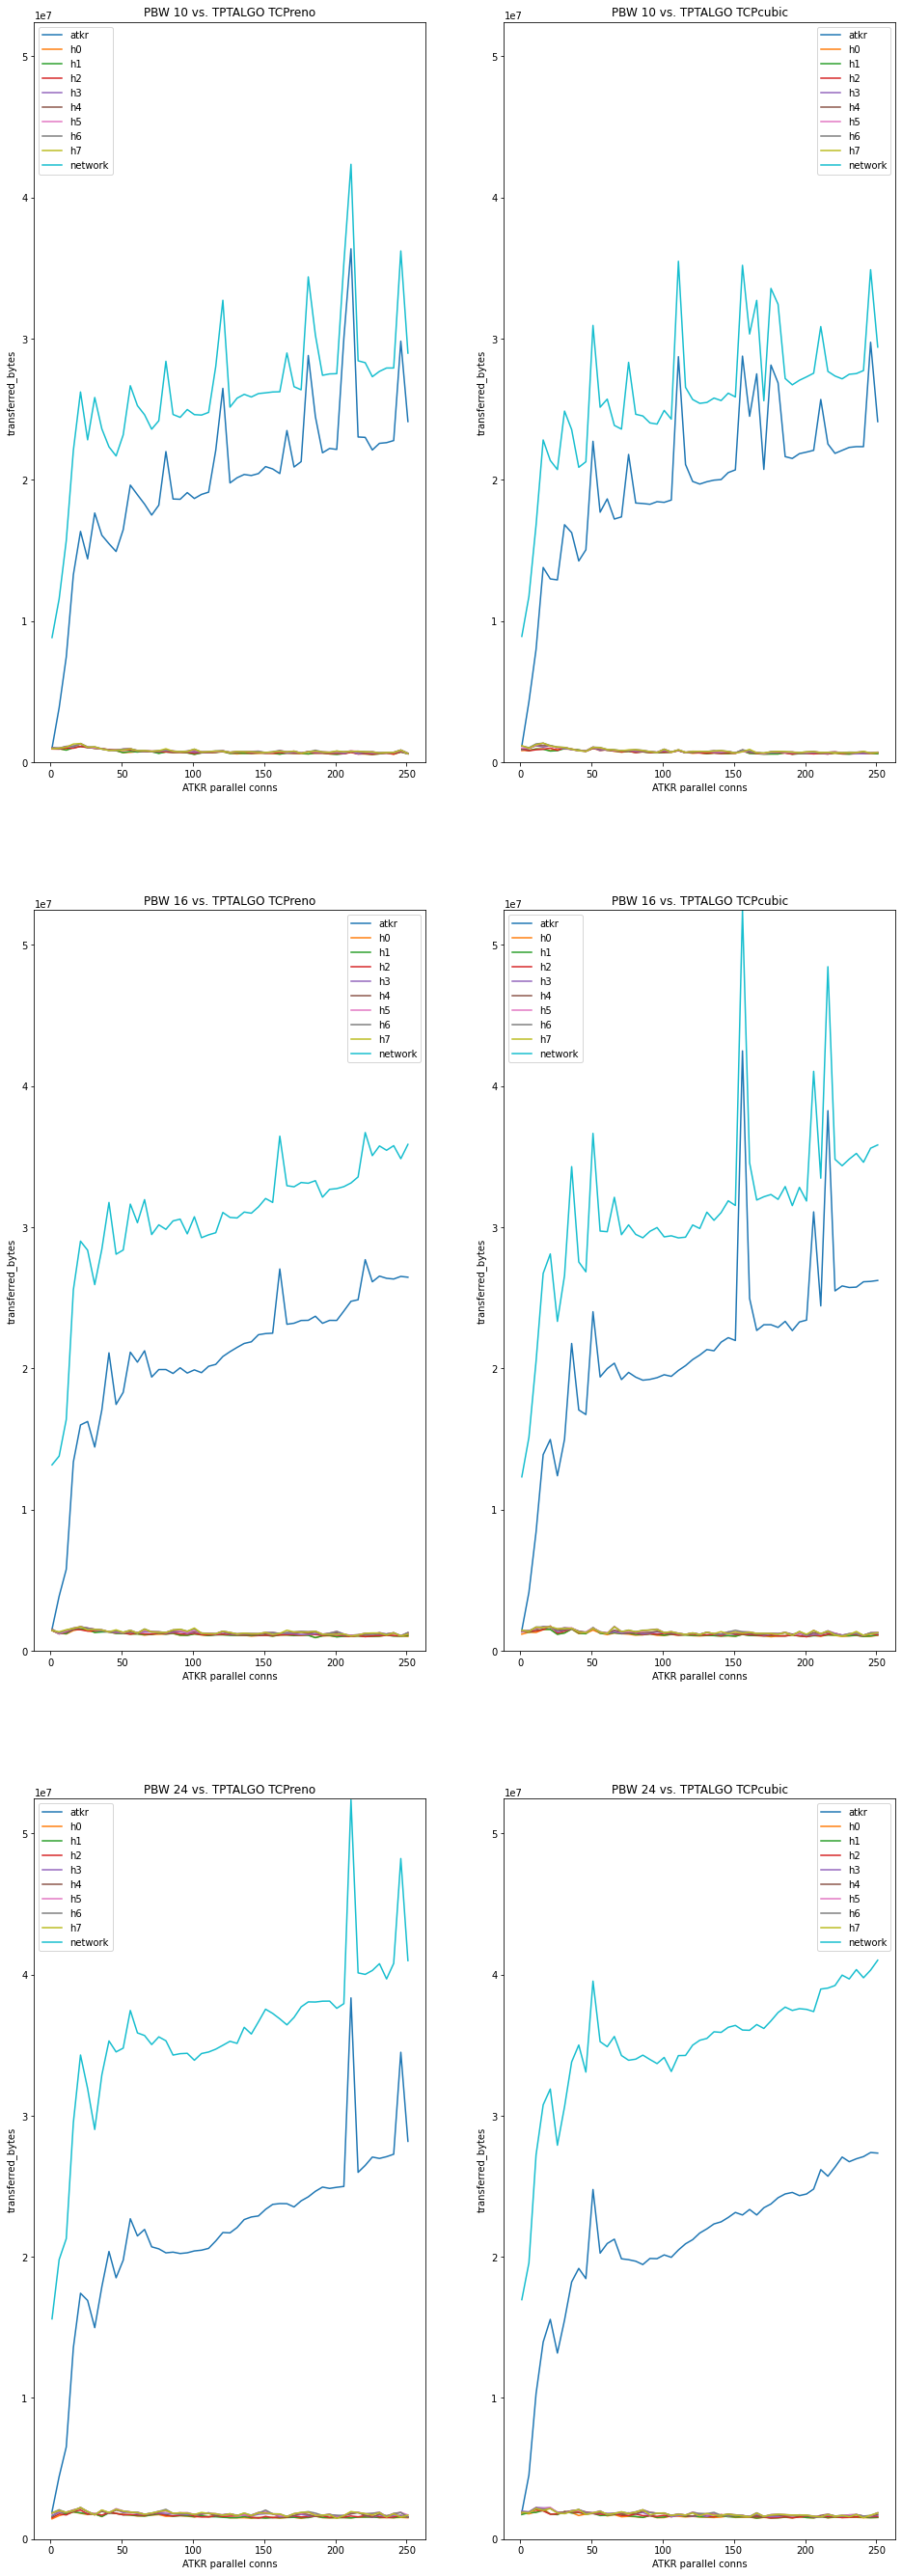

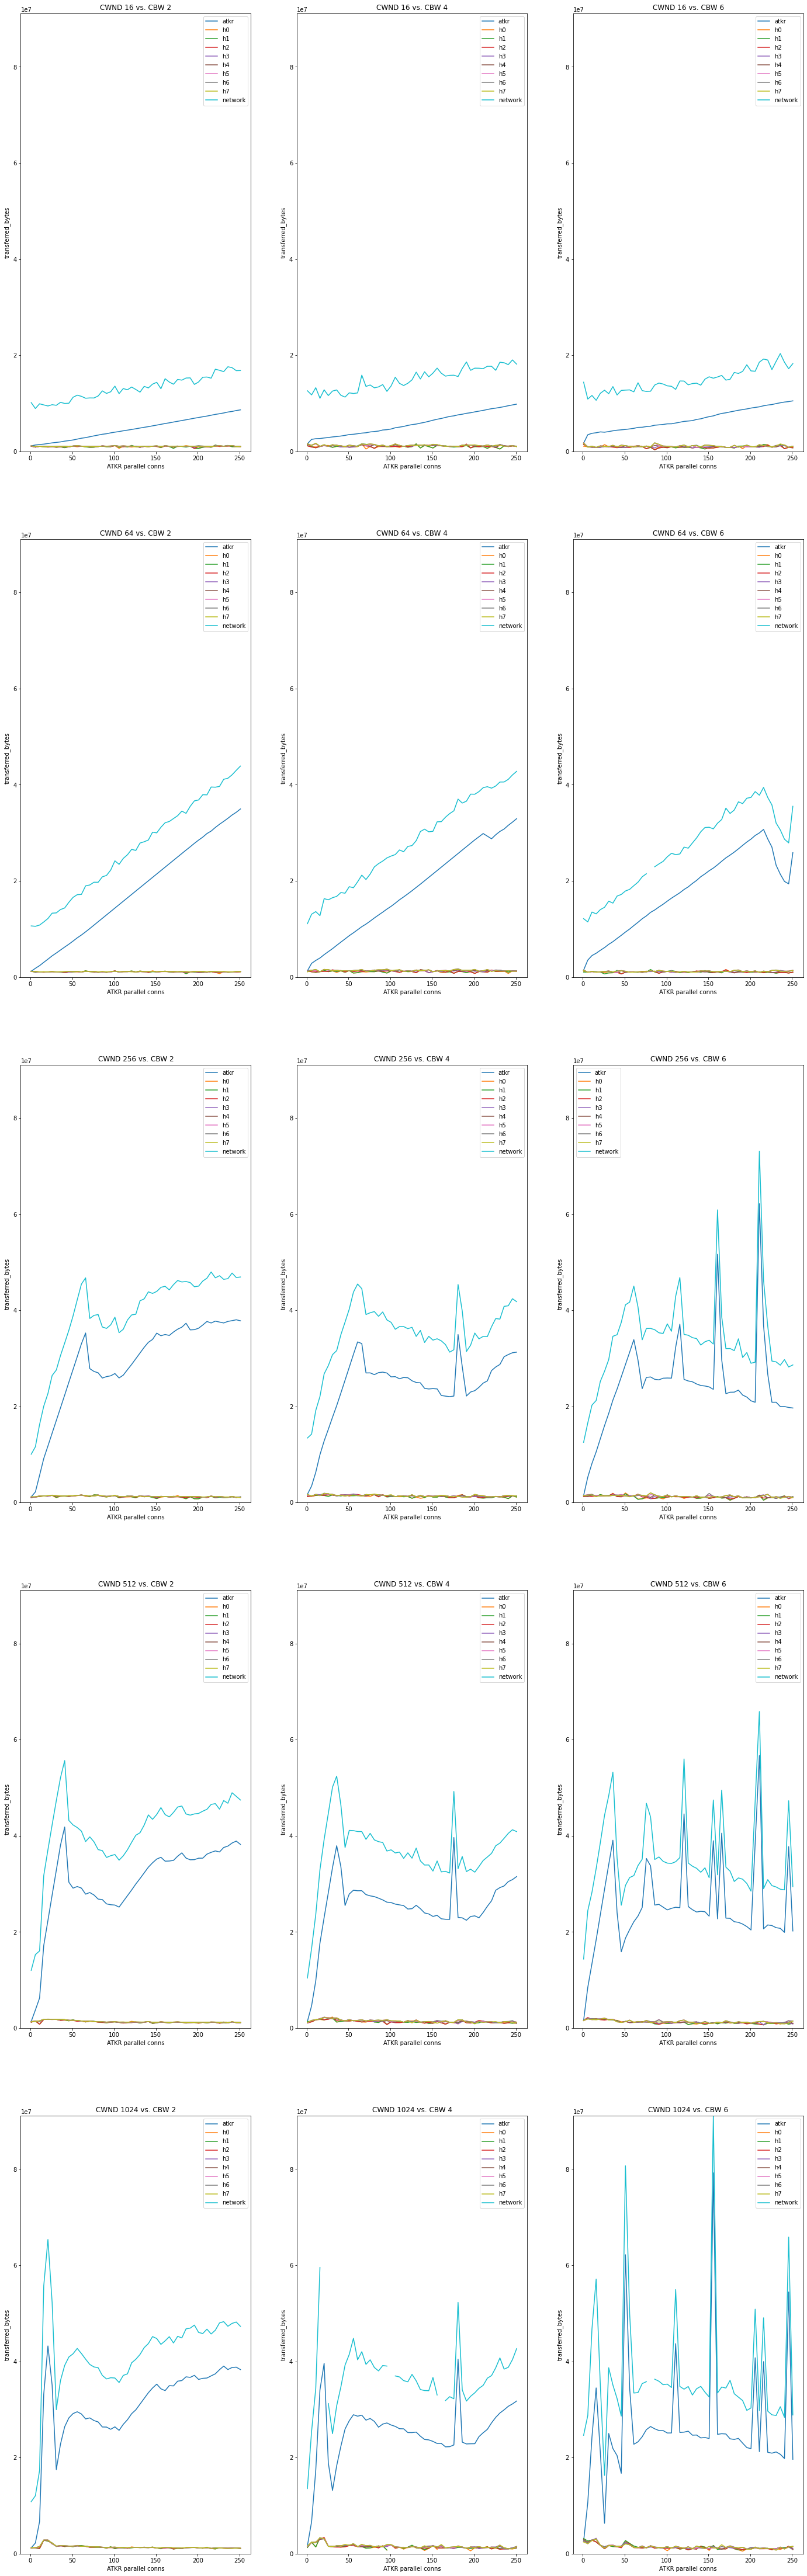

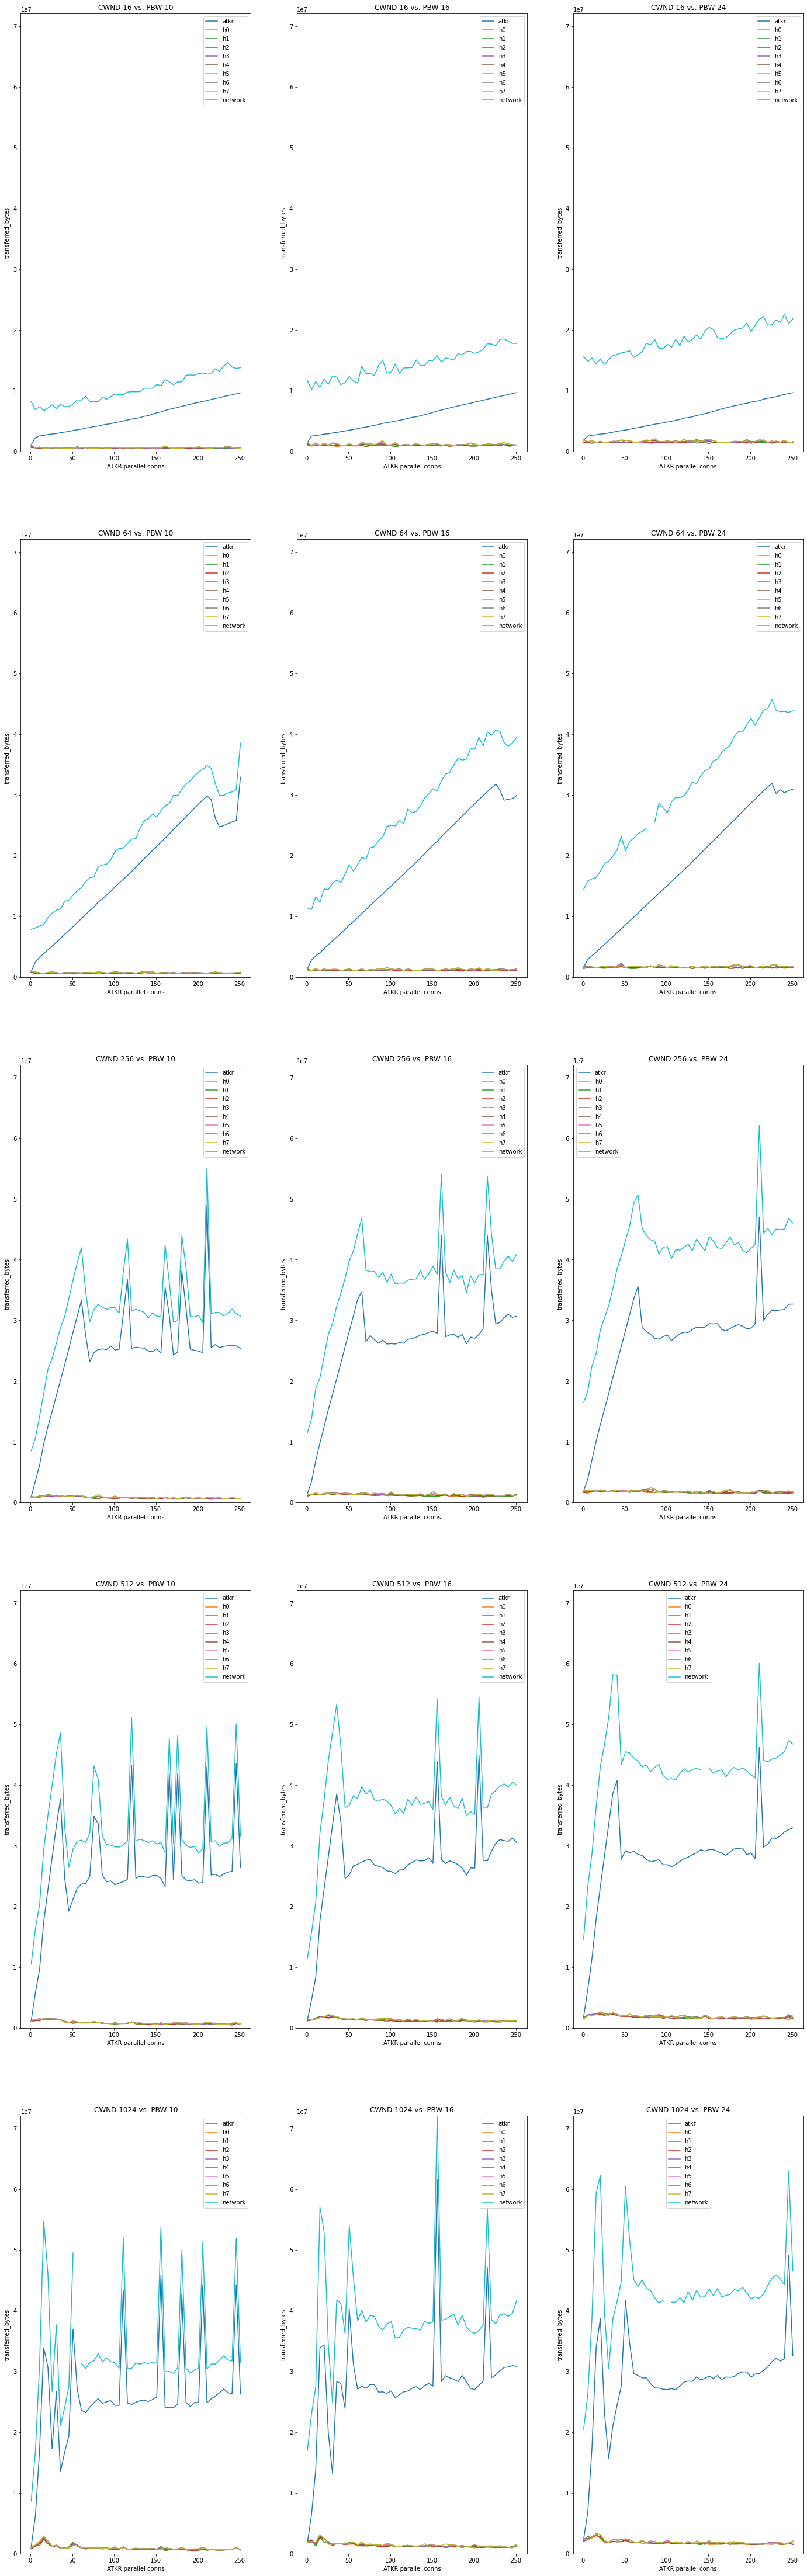

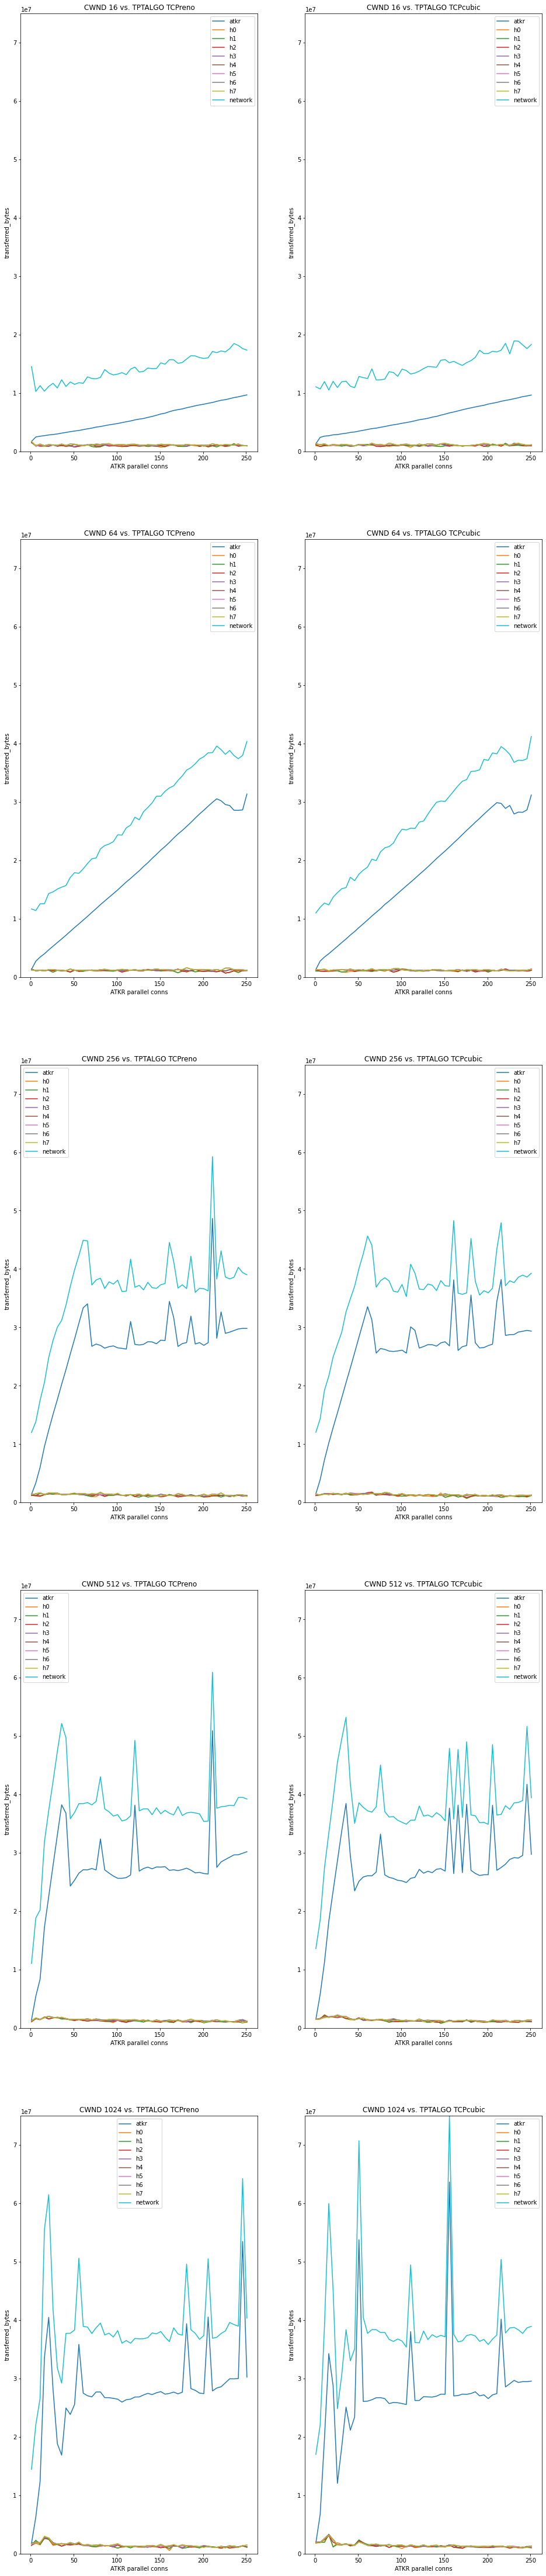

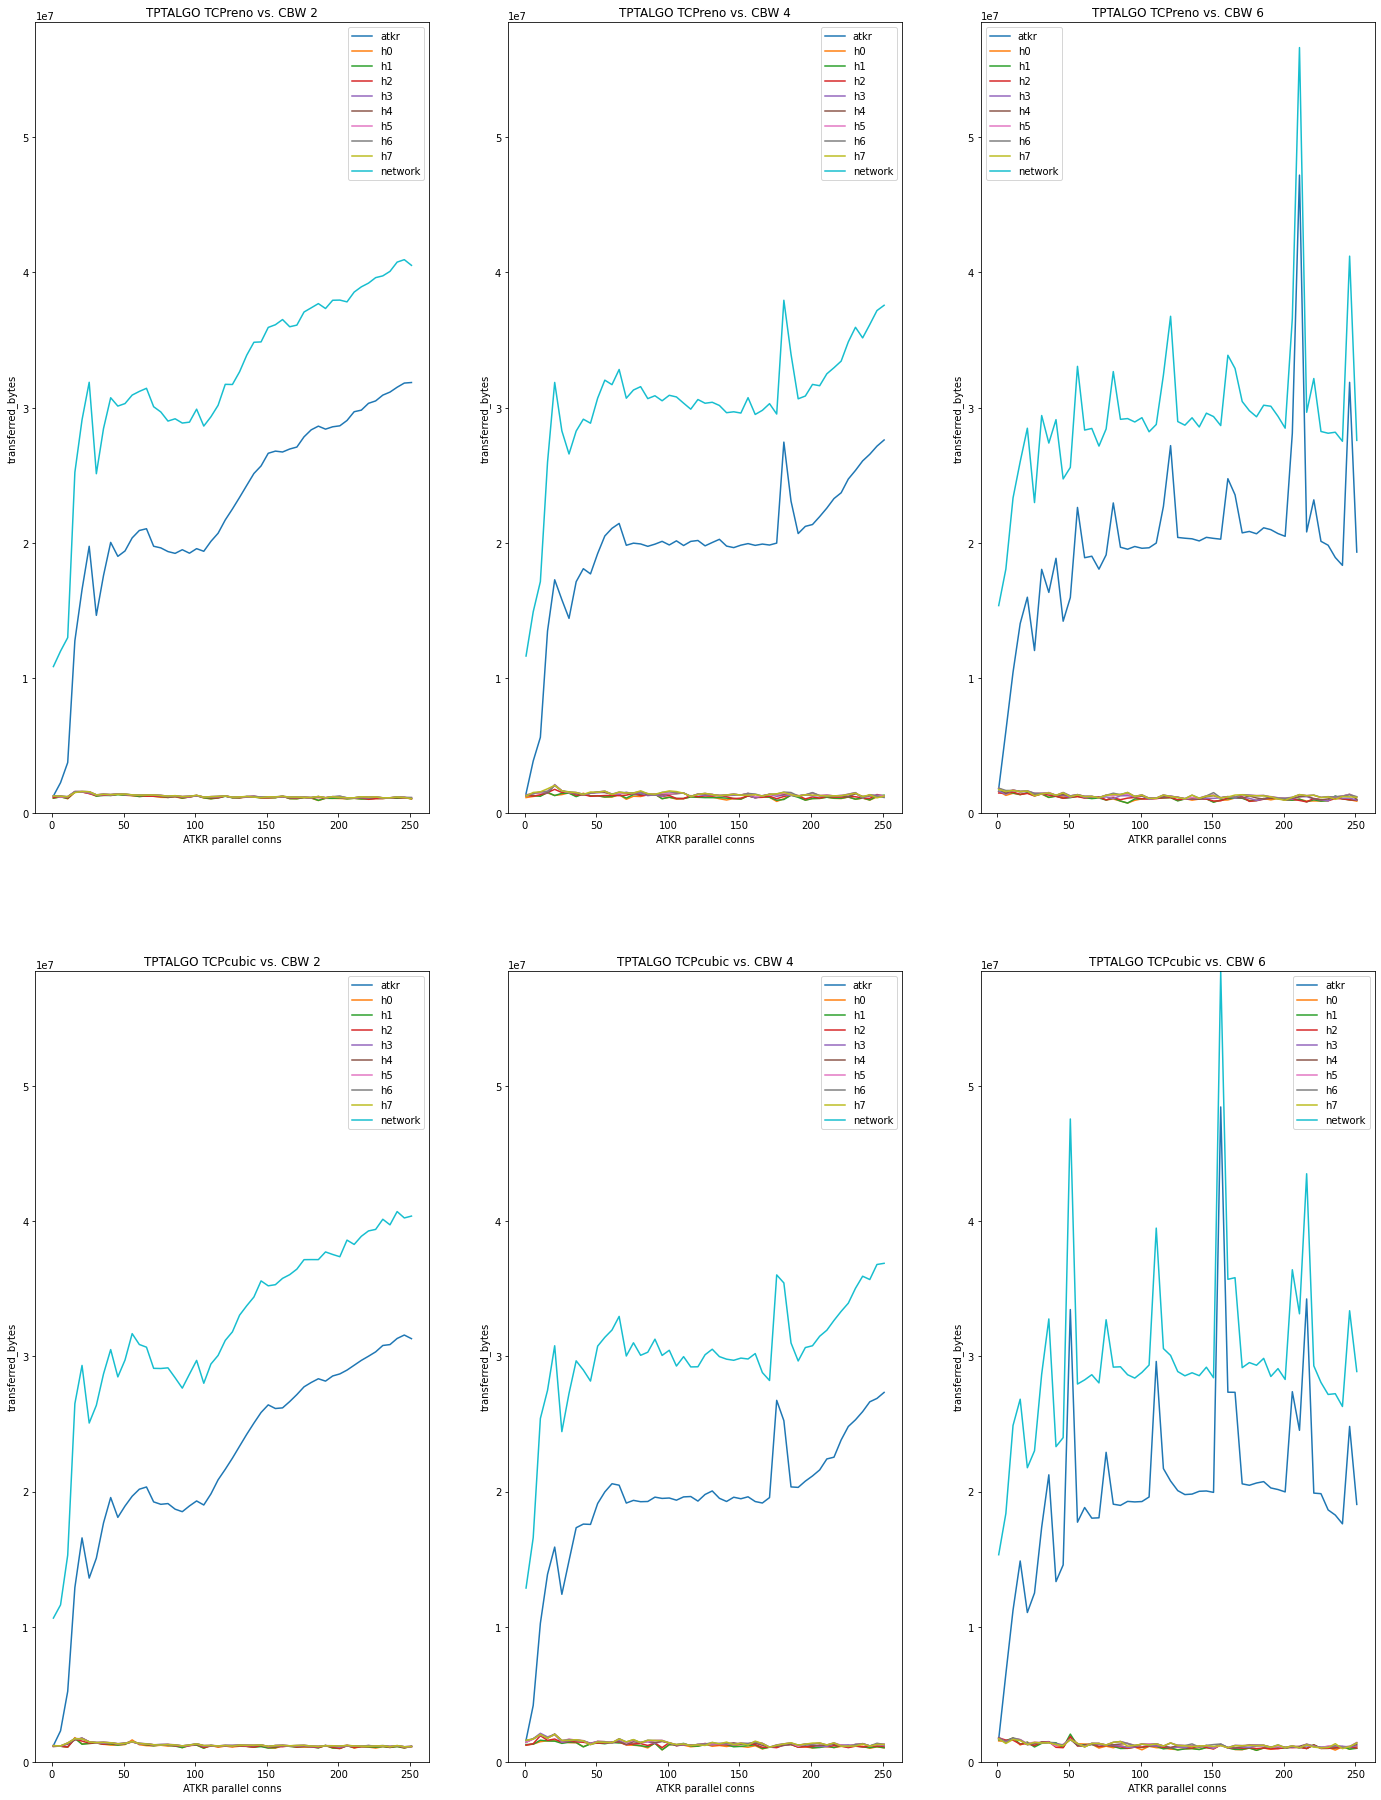

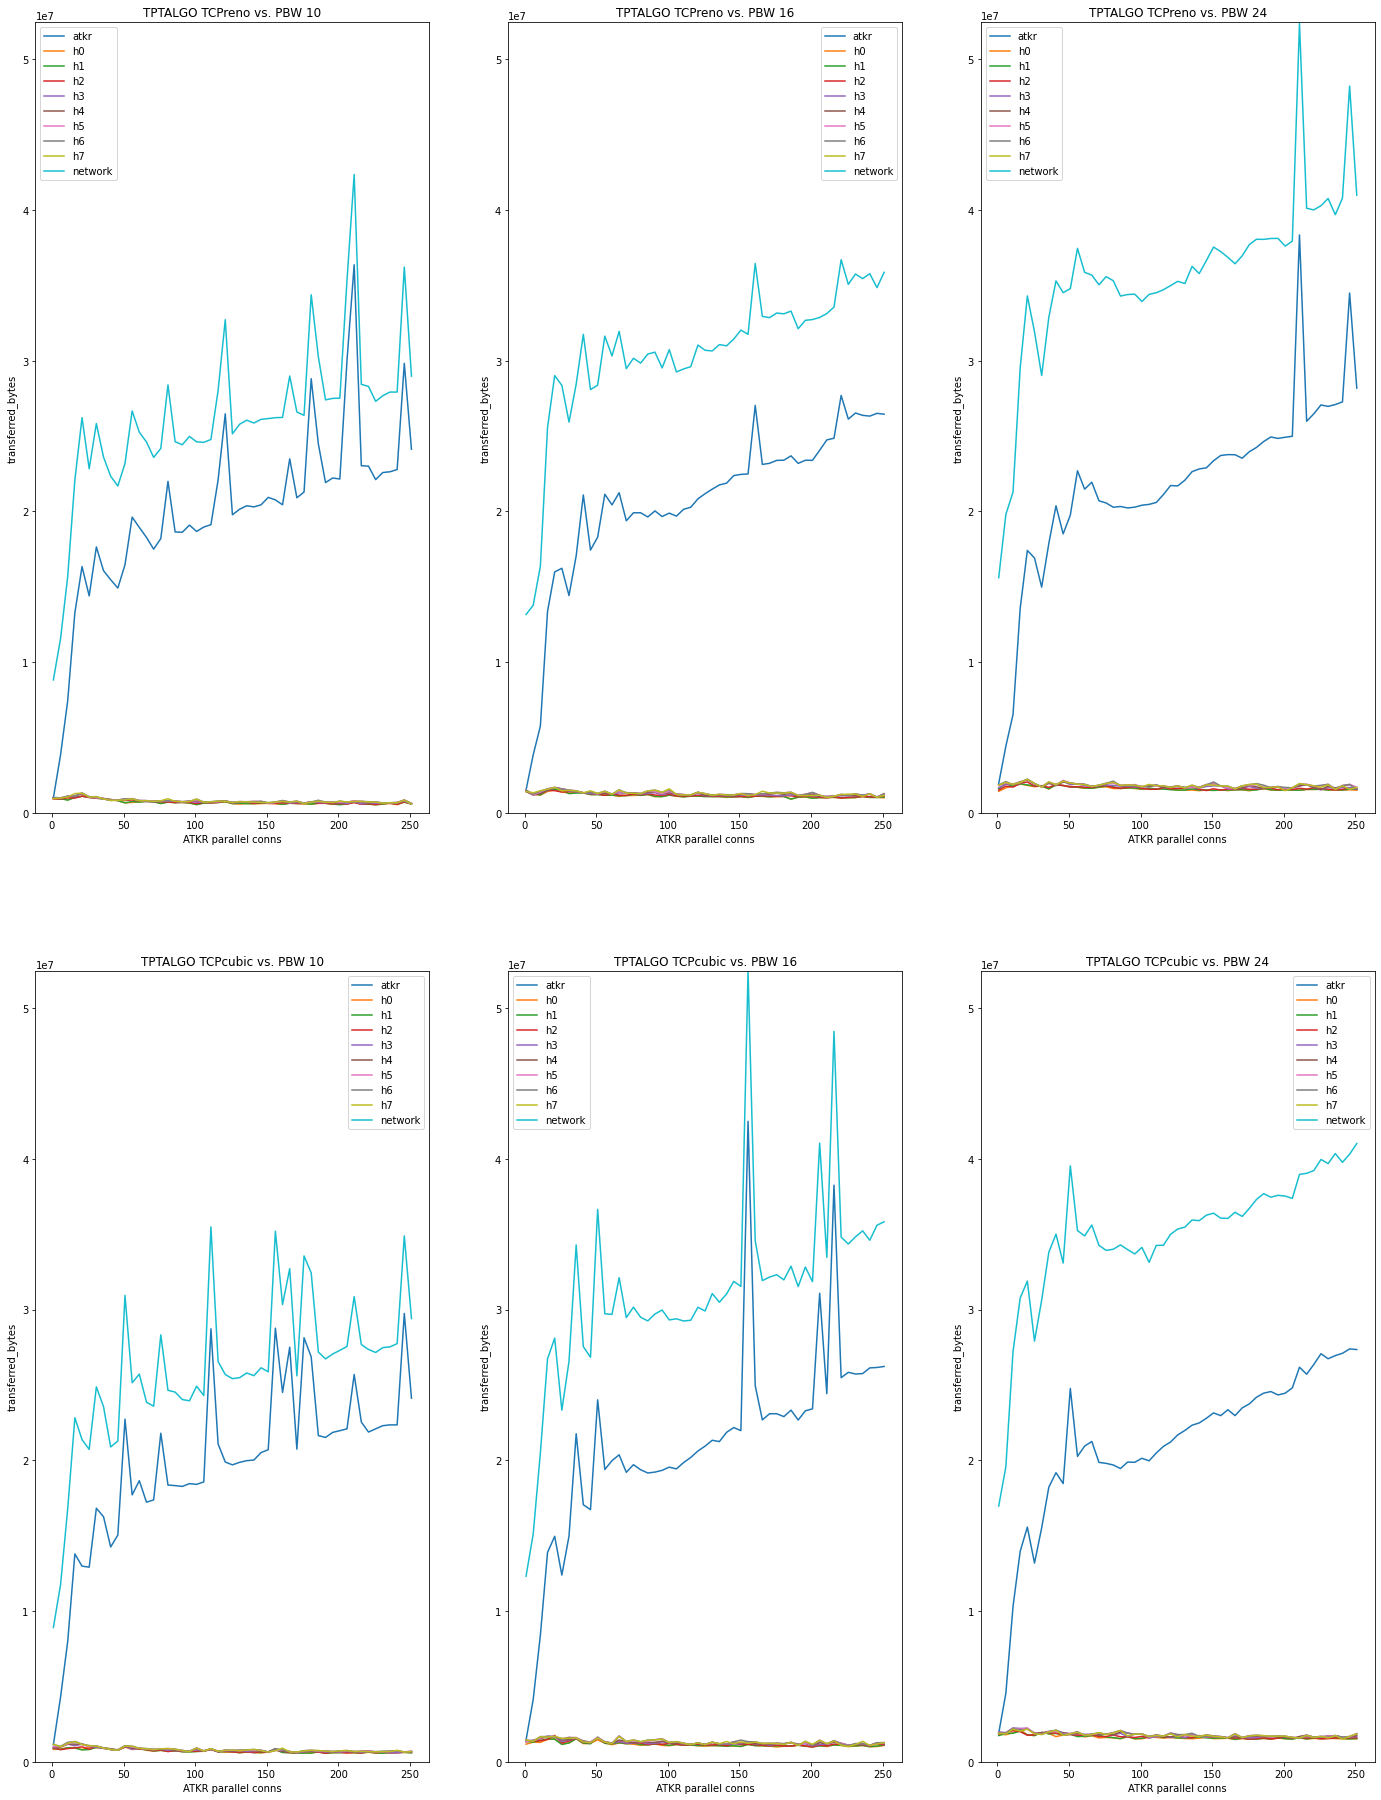

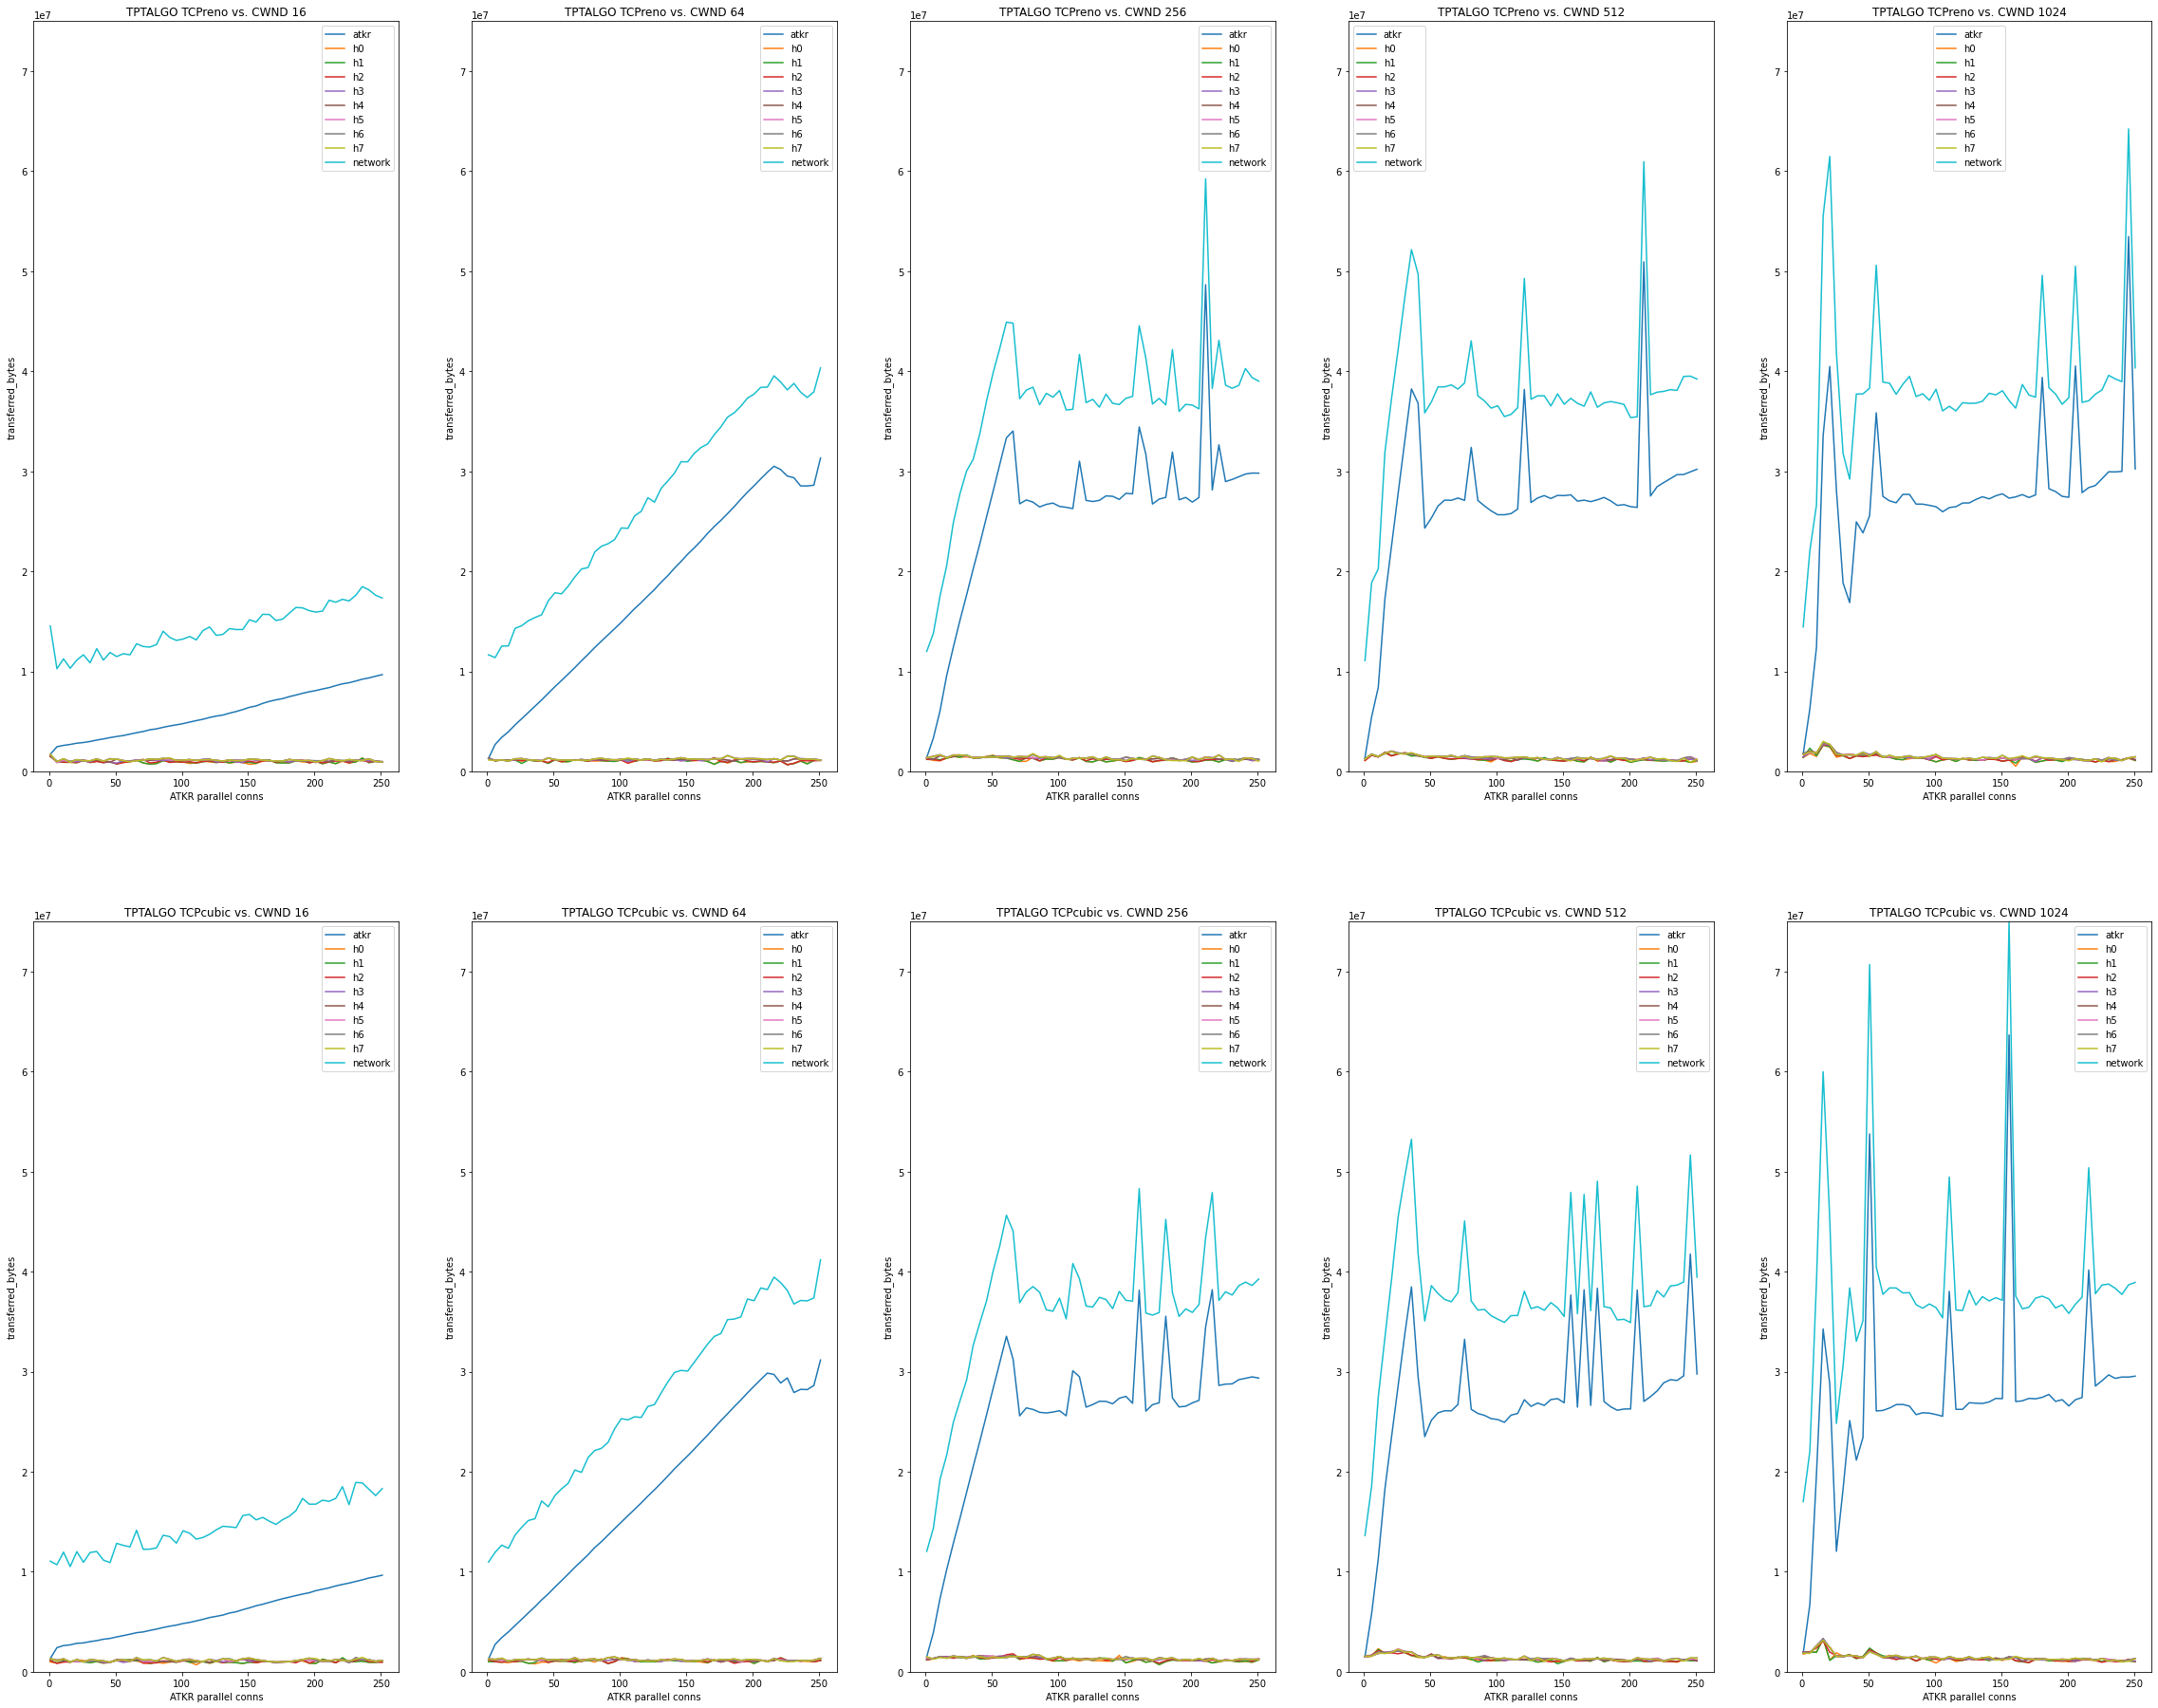

In [7]:
SCALAR_FIG_SZ = 8

for indeX in indices:
    for indeY in indices:
        if indices.index(indeX) == indices.index(indeY): continue
        AX_R_NAME, AX_R_VALS = indeX
        AX_C_NAME, AX_C_VALS = indeY
        AX_R_LEN , AX_C_LEN  = len(AX_R_VALS), len(AX_C_VALS)
        print(f'{AX_R_LEN} x {AX_C_LEN}\t', AX_R_NAME, '\tvs.  ', AX_C_NAME)
        
        fig, axs = plt.subplots(AX_R_LEN, AX_C_LEN, figsize=(AX_C_LEN*SCALAR_FIG_SZ, AX_R_LEN*SCALAR_FIG_SZ*2))
        
        maxY = 0
        for R_VAL in AX_R_VALS:
            df0 = dfbigboi[dfbigboi[AX_R_NAME] == R_VAL]
            for C_VAL in AX_C_VALS:
                df1 = df0[df0[AX_C_NAME] == C_VAL]
                axi = axs[AX_R_VALS.index(R_VAL)][AX_C_VALS.index(C_VAL)]
                
                net_data = [0] * len(ATK_PARA)
                for HOST in hostnames:
                    df2 = df1[df1['host'] == HOST]
                    host_data = []
                    for APC in ATK_PARA:
                        df3 = df2[df2['APC'] == APC]
                        host_total = df3.sum()['transferred_bytes'] // df3.shape[0]
                        host_data.append(host_total)
                        net_data[ATK_PARA.index(APC)] += host_total
                    maxY = max(maxY, max(host_data), max(net_data))
                    axi.plot(ATK_PARA, host_data, label=HOST)
                axi.plot(ATK_PARA, net_data, label='network')
                axi.legend()
                axi.set_xlabel('ATKR parallel conns')
                axi.set_ylabel('transferred_bytes')
                axi.set_title(f'{AX_R_NAME} {R_VAL} vs. {AX_C_NAME} {C_VAL}')
                
        for R_VAL in AX_R_VALS:
            for C_VAL in AX_C_VALS:
                axi = axs[AX_R_VALS.index(R_VAL)][AX_C_VALS.index(C_VAL)]
                axi.set_ylim(bottom=0, top=maxY)

        fig.savefig(f'VIZ_{AX_R_NAME}-{AX_C_NAME}.png', facecolor="w")